# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [72]:
print("Чтобы при повторных запусках генераторы псевдослучайных чисел и использующие их функции давали одни и те же значения.")

Чтобы при повторных запусках генераторы псевдослучайных чисел и использующие их функции давали одни и те же значения.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [73]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [74]:
df_train.sample(10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [75]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [76]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [77]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [78]:
df_train.describe(include="object")

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [79]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [80]:
df_test.describe(include="object")

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [81]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


В `df_train` есть пропуски в столбцах `mileage`, `engine`, `max_power`, `torque`, `seats`.

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


В `df_test` есть пропуски в столбцах `mileage`, `engine`, `max_power`, `torque`, `seats`.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [83]:
nontarget_columns = df_train.columns.drop('selling_price')
df_train[df_train.duplicated(subset=nontarget_columns) == True].shape[0]

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [84]:
df_train[df_train.duplicated(subset=nontarget_columns) == True].head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [85]:
df_train.drop_duplicates(subset=nontarget_columns, inplace=True)

In [86]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [87]:
df_train = df_train.reset_index(drop=True)
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [88]:
for data in [df_train, df_test]:
    for column in ["engine", "mileage", "max_power"]:
        data[column] = data[column].str.extract(r'(\d*\.\d+|\d+)', expand=False).astype(float)
    data.drop("torque", axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [89]:
for column in ["mileage", "engine", "max_power", "seats"]:
    median = df_train[column].median()
    for df in [df_train, df_test]:
      df.fillna(median, inplace=True)

In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   float64
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 547.6+ KB


In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        1000 non-null   float64
 9   engine         1000 non-null   float64
 10  max_power      1000 non-null   float64
 11  seats          1000 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 93.9+ KB



(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

**Ответ:**
Переменная `seats` означает количество мест в машине. Характер распределения этой переменной дискретный, она изменяется в довольно ограниченном диапазоне, в зависимости от типа автомобиля. Поэтому более уместно было бы рассматривать ее как категориальную.

In [92]:
for data in [df_train, df_test]:
    for column in ["seats", "engine"]:
        data[column] = data[column].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 547.6+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

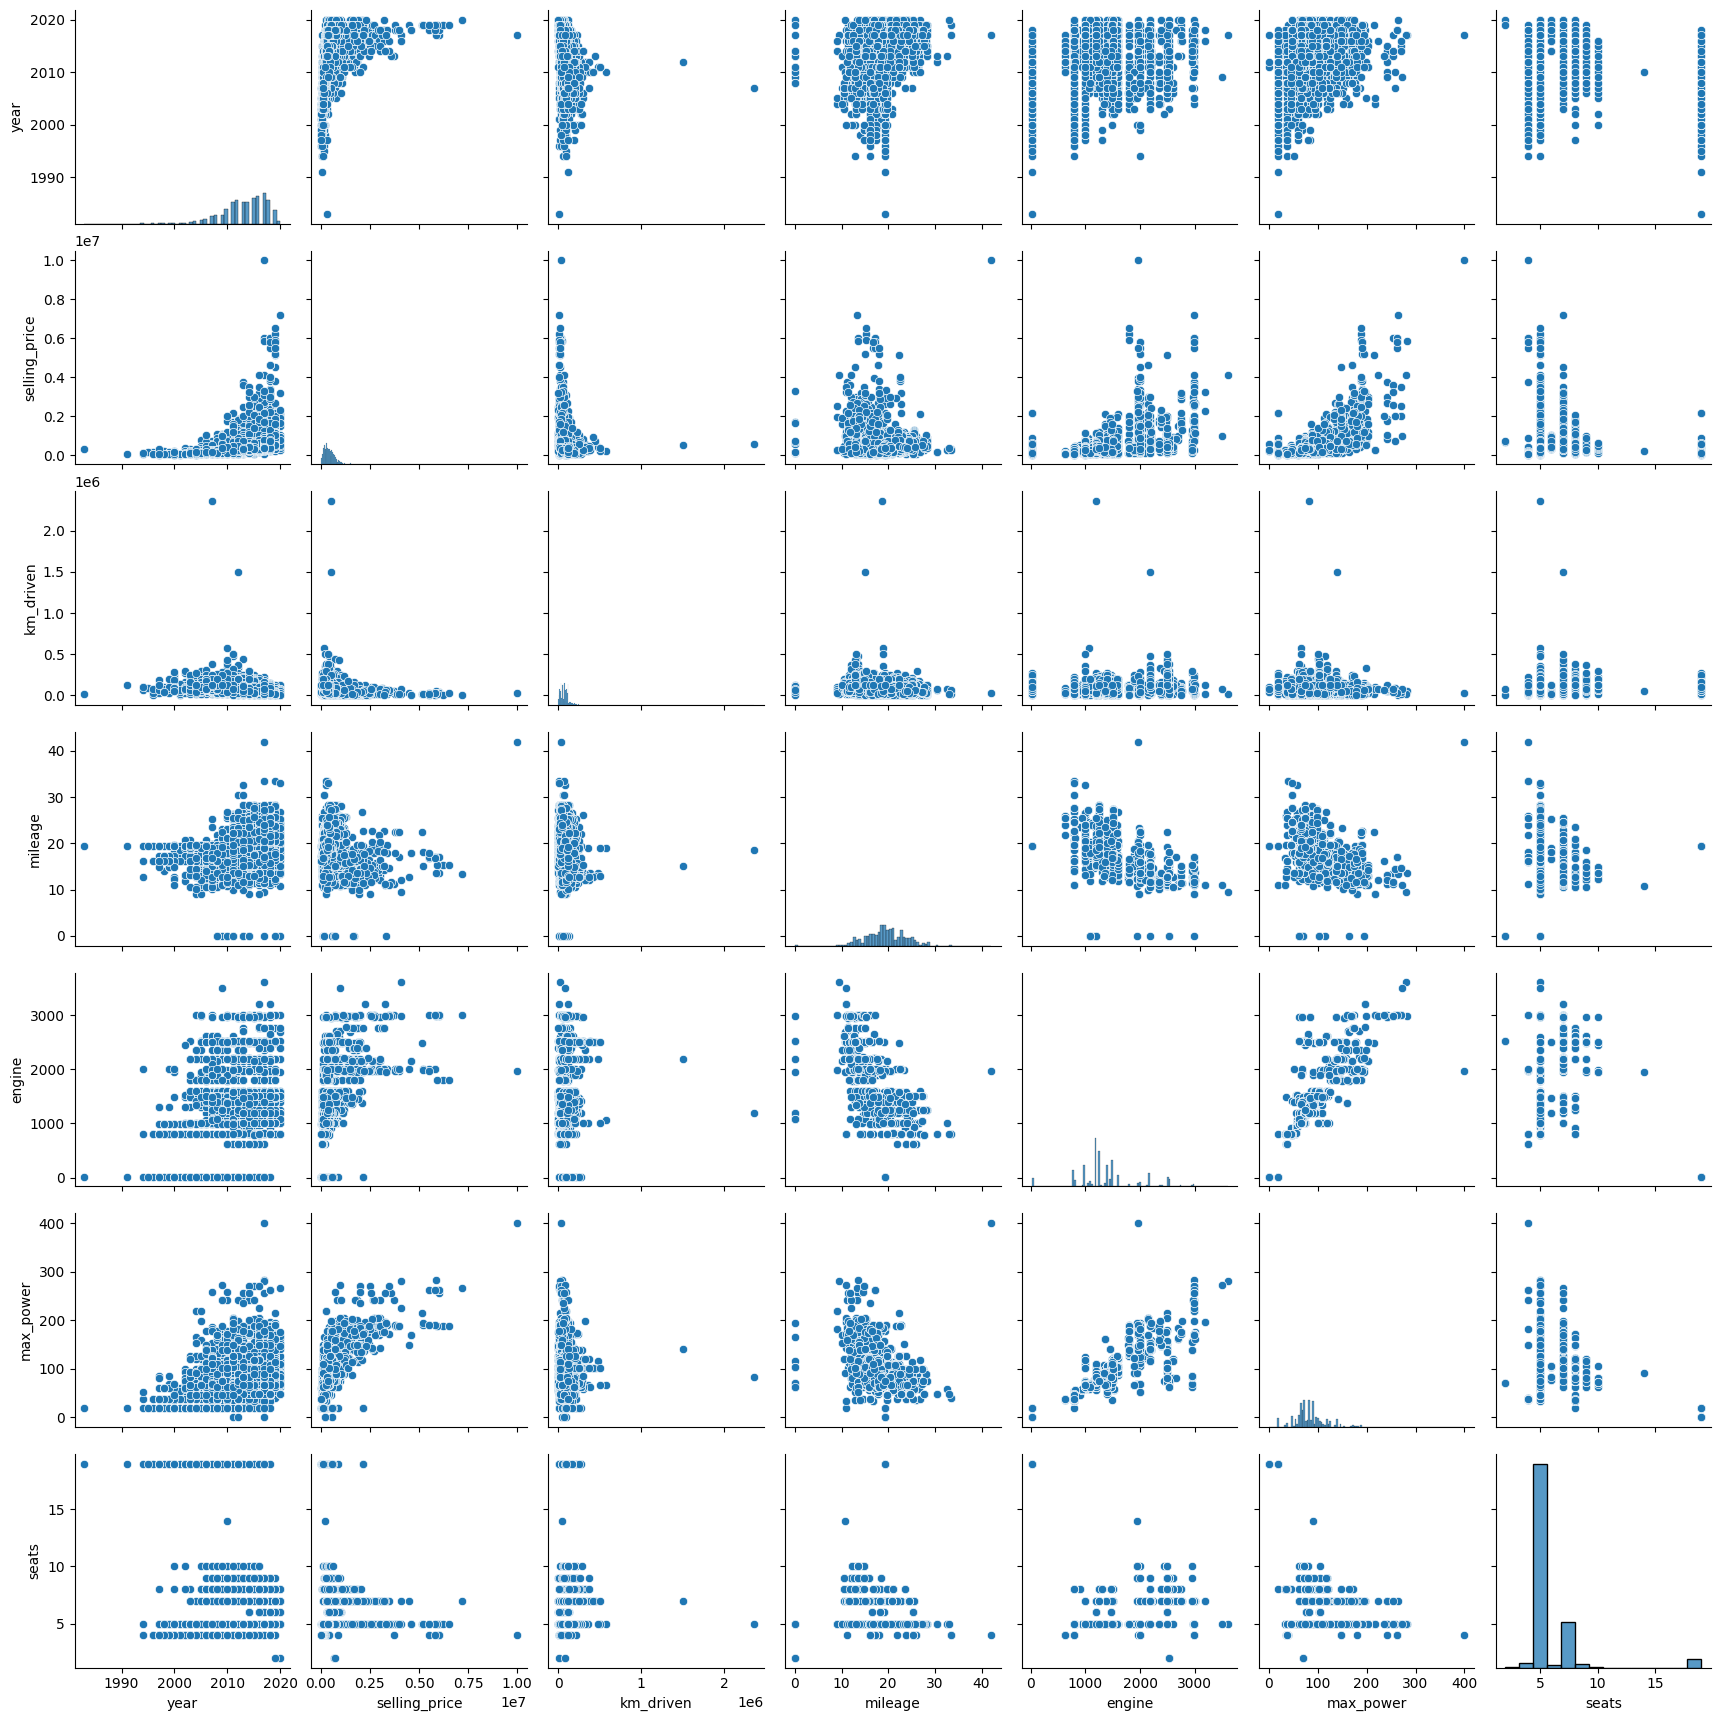

In [93]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Ответ:**
- Для целевой переменной `selling_price` заметно прослеживаются положительные корреляции с признаками `year`, `max_power`, `engine`; возможно, небольшая отрицательная корреляция с `km_driven`. Об остальных связях сложнее судить на глаз.
- Друг с другом заметно коррелируют признаки `max_power` и `engine`, оба они также отрицательно коррелируют с `mileage`. Можно интерпретировать эти корреляции так: больший объем двигателя в среднем дает большую мощность, а чем мощнее двигатель, тем более высокого расхода топлива (и, соответственно, меньшего пробега на единицу) можно ожидать.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

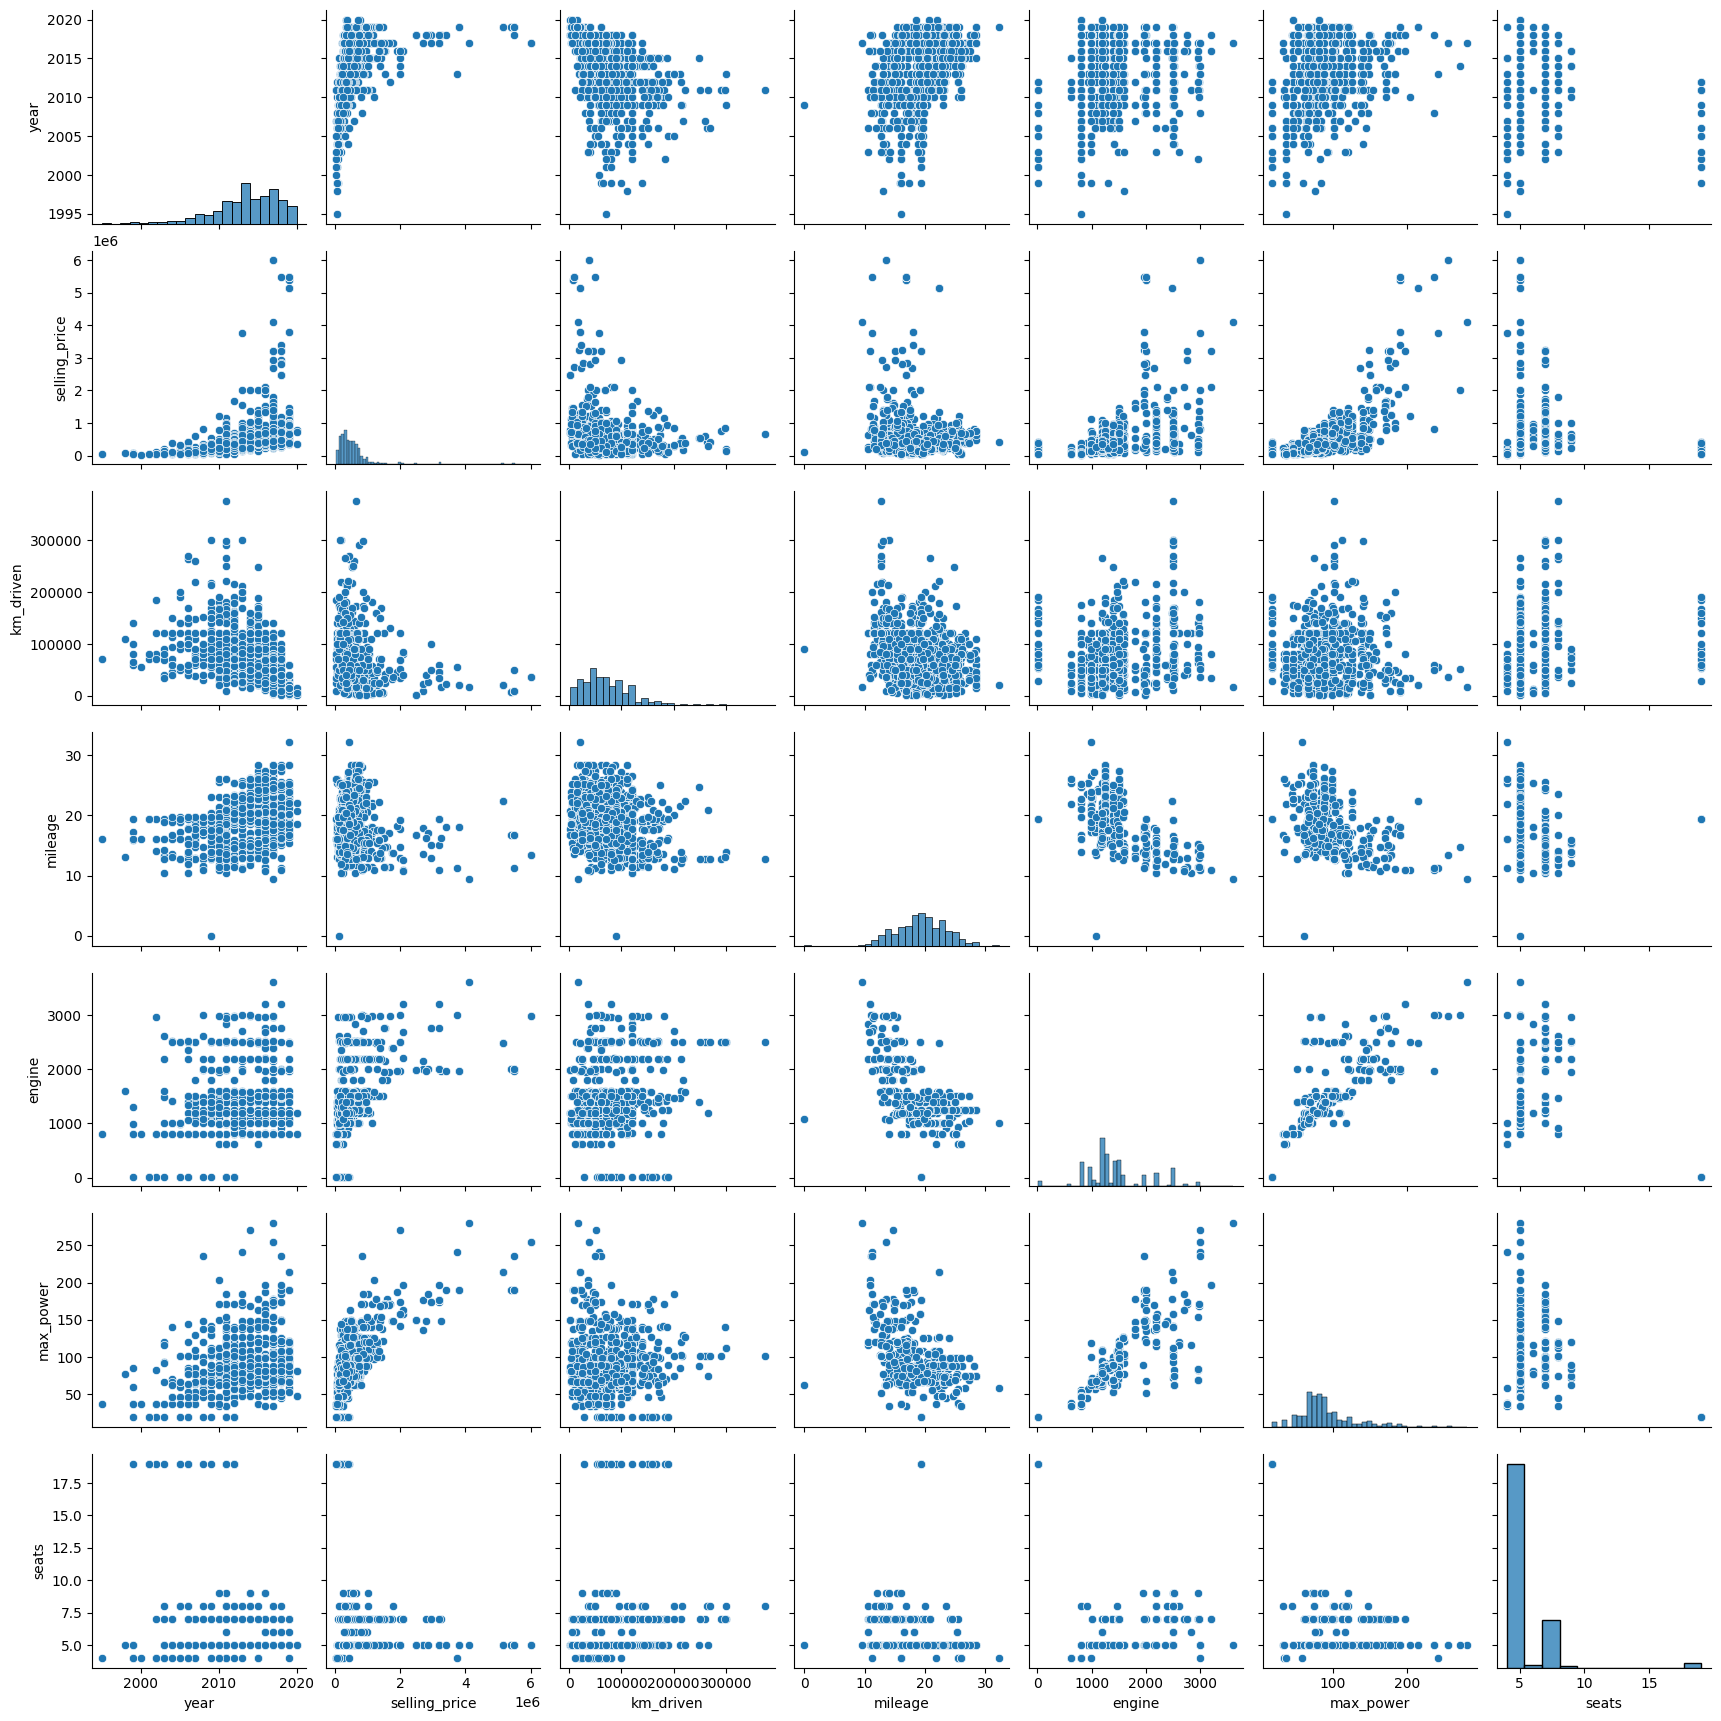

In [94]:
sns.pairplot(df_test)

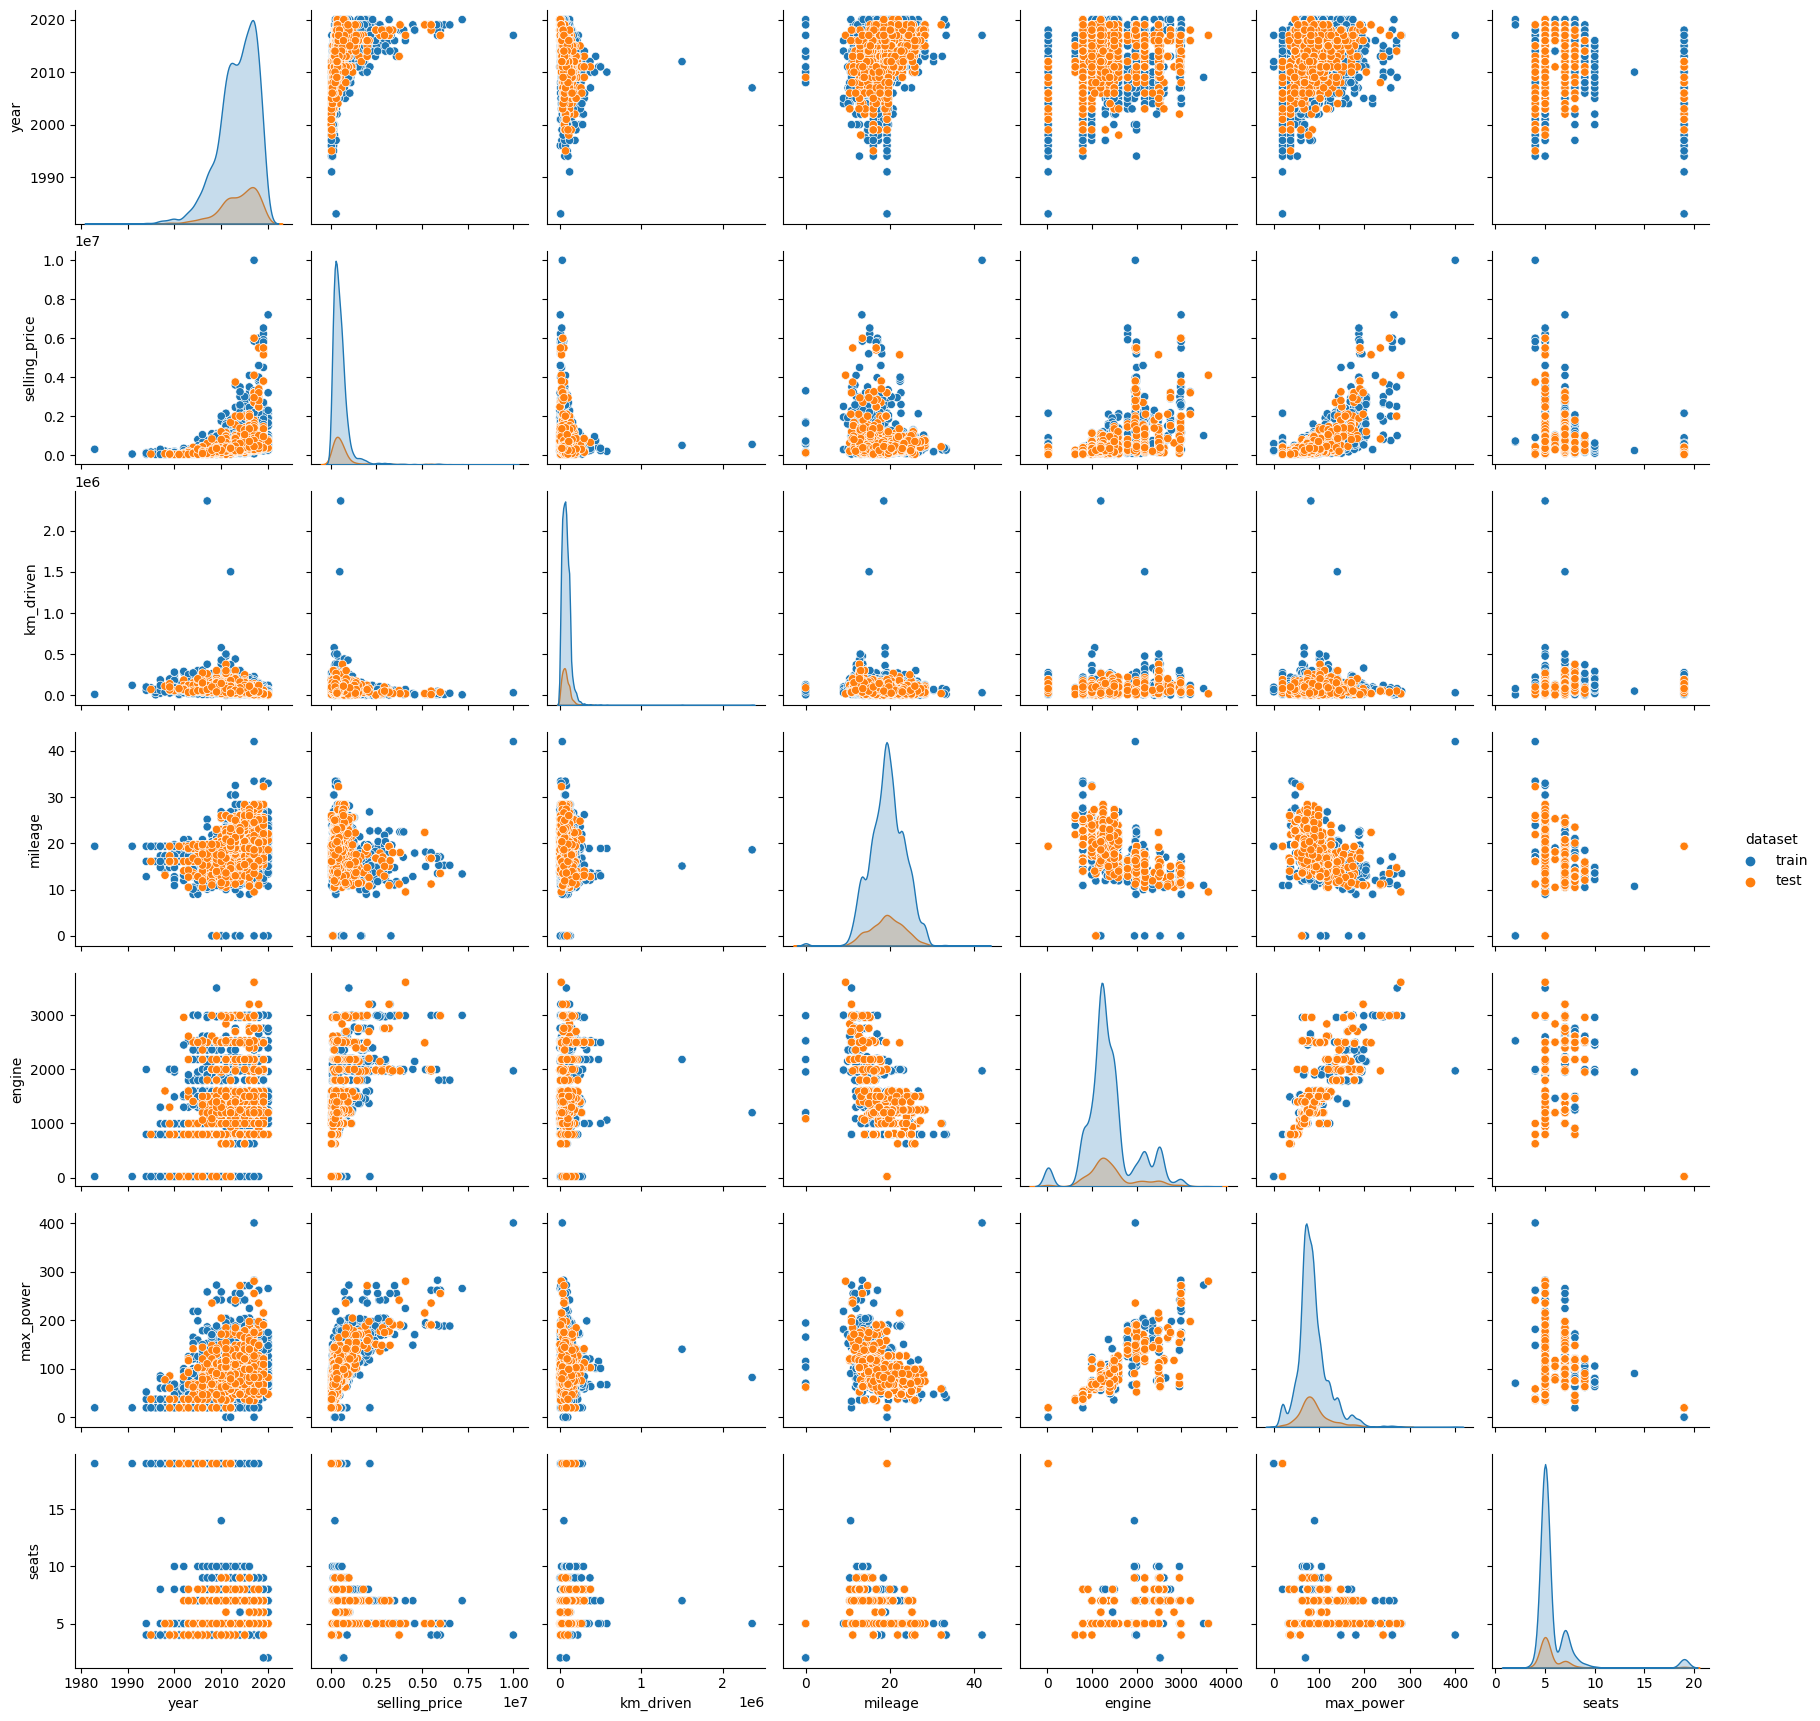

In [95]:
sns.pairplot(pd.concat([df_train.assign(dataset='train'), df_test.assign(dataset='test')]), hue="dataset")

**Ответ:** Выше приведены распределения на одном графике. Визуально распределения для трейна и теста выглядят достаточно похожими.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

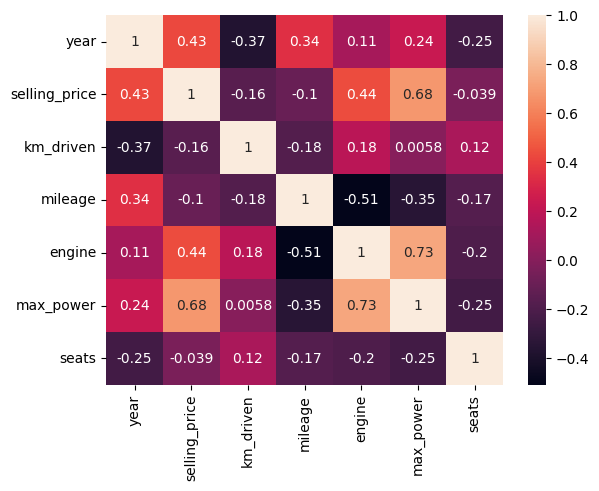

In [96]:
corr = df_train.select_dtypes("number").corr()
sns.heatmap(corr, annot=True)

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ:**
- Наименьшая корреляция - между признаками `mileage` и `engine`.
- Довольно сильная зависимость наблюдается между `max_power` и `engine`.
- Утверждение о том, что чем меньше год (т.е. чем старше автомобиль), тем больше километров он проехал, применимо к среднему автомобилю выглядит справедливо: между признаками `year` и `km_driven` есть довольно заметная отрицательная корреляция.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='engine', ylabel='max_power'>

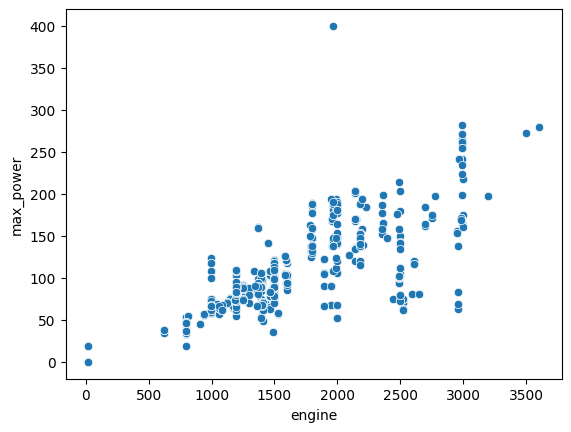

In [97]:
sns.scatterplot(df_train, x="engine", y="max_power")

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [98]:
# your code here

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [99]:
y_train = df_train["selling_price"]
X_train = df_train.select_dtypes("number").drop("selling_price", axis=1)

In [100]:
assert X_train.shape == (5840, 6)

In [101]:
y_test = df_test["selling_price"]
X_test = df_test.select_dtypes("number").drop("selling_price", axis=1)

In [102]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

metrics = {"R2": r2_score, "MSE": MSE}
y_real = {"train": y_train, "test": y_test}
X = {"train": X_train, "test": X_test}
samples = ("train", "test")

def calculate_metrics(y_pred):
    return {
        sample: {
            metric: metrics[metric](y_real[sample], y_pred[sample])
            for metric in metrics
        }
        for sample in samples
    }

def predict_samples(trained_model, data):
    return {
        sample: trained_model.predict(data[sample])
        for sample in samples
    }

In [104]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = predict_samples(linreg, X)
calculate_metrics(y_pred)

{'train': {'R2': 0.5849342447550595, 'MSE': 118973758392.67097},
 'test': {'R2': 0.5811891731938887, 'MSE': 240744422658.69965}}

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train, y_train)
columns = X_train.columns
X = {
    sample: pd.DataFrame(scaler.transform(X[sample]), columns=columns)
    for sample in samples
}
X_train, X_test = X["train"], X["test"]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = predict_samples(linreg, X)
calculate_metrics(y_pred)

{'train': {'R2': 0.584934244755061, 'MSE': 118973758392.67055},
 'test': {'R2': 0.5811891731939052, 'MSE': 240744422658.69012}}

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [106]:
pd.DataFrame(linreg.coef_, index=X_train.columns, columns=["weight"])

,weight
year,139186.479415
km_driven,-46032.647854
mileage,37510.745606
engine,-3822.245295
max_power,376513.113640
seats,117442.888444


**Ответ:** Наибольший вес в линейной модели имеет признак `max_power`.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [107]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42).fit(X_train, y_train)
y_pred = predict_samples(lasso_reg, X)
calculate_metrics(y_pred)

{'train': {'R2': 0.5849342447198149, 'MSE': 118973758402.77342},
 'test': {'R2': 0.5811878574984262, 'MSE': 240745178958.022}}

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [108]:
pd.DataFrame(lasso_reg.coef_, index=X_train.columns, columns=["weight"])

,weight
year,139186.134040
km_driven,-46032.271389
mileage,37509.815397
engine,-3819.287181
max_power,376509.307478
seats,117441.256538


Зануленных признаков пока нет. По умолчанию используется коэффициент
регуляризации `alpha = 1.0`, для зануления, скорее всего, потребуется более мощная регуляризация с большим коэффициентом.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [109]:
from sklearn.model_selection import GridSearchCV

lasso_reg = Lasso(random_state=42)
alphas = np.logspace(-2, 5, 50)
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso_reg, param_grid, cv=10)
grid_search.fit(X_train, y_train)

y_pred = predict_samples(grid_search, X)
calculate_metrics(y_pred)

{'train': {'R2': 0.580209109526827, 'MSE': 120328163303.00786},
 'test': {'R2': 0.5632086971428583, 'MSE': 251080113736.8051}}

In [110]:
def plot_grid_search(alphas, scores):
    sns.scatterplot(x=alphas, y=scores)
    plt.ylabel("CV score")
    plt.xlabel("alpha")
    plt.axhline(np.max(scores), linestyle="--", color=".5")

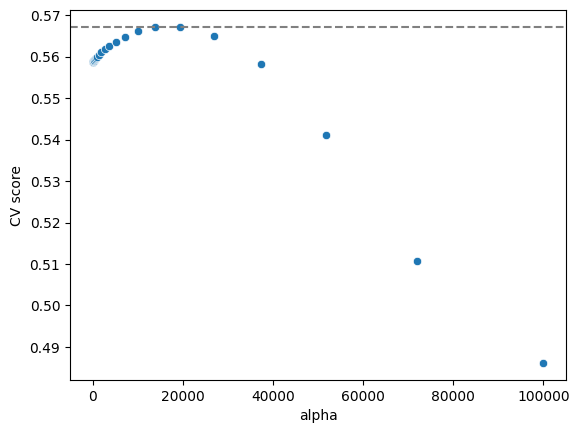

In [111]:
scores = grid_search.cv_results_["mean_test_score"]
plot_grid_search(alphas, scores)

Сузим интервал поиска:

In [112]:
alphas = np.linspace(10000, 20000, 50)
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Lasso(random_state=42), param_grid, cv=10)
grid_search.fit(X_train, y_train)

y_pred = predict_samples(grid_search, X)
calculate_metrics(y_pred)

{'train': {'R2': 0.5784177286609269, 'MSE': 120841641737.7756},
 'test': {'R2': 0.5596536990866825, 'MSE': 253123628134.73413}}

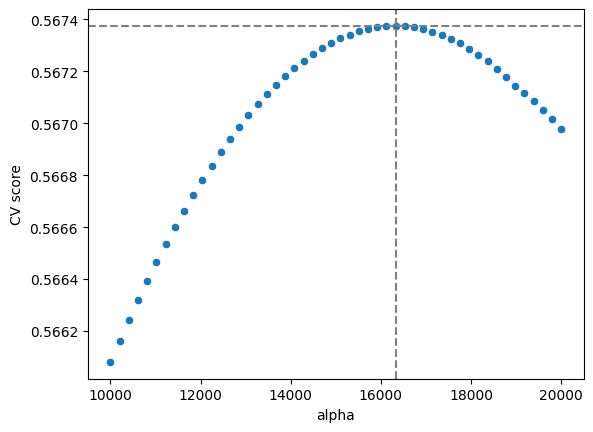

In [113]:
scores = grid_search.cv_results_["mean_test_score"]

plot_grid_search(alphas, scores)
plt.axvline(grid_search.best_params_["alpha"], linestyle="--", color=".5")

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

С учетом использования 10-фолд валидации нужно обучать по 10 моделей на каждое значение `alpha` из `param_grid`.

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [114]:
best_alpha = grid_search.best_params_["alpha"]
print(f"Коэффициент регуляризации лучшей модели: {best_alpha}")

Коэффициент регуляризации лучшей модели: 16326.530612244898


In [115]:
pd.DataFrame(grid_search.best_estimator_.coef_, index=X_train.columns, columns=["weight"])

,weight
year,139120.610831
km_driven,-31811.407303
mileage,7100.970002
engine,-0.000000
max_power,338908.287244
seats,85549.427164


Занулился вес при параметре `engine`, который, как было отмечено раньше, сильно коррелирует с `max_power`, поэтому дополнительный вклад в предсказание целевой переменной, по-видимому, вносит незначительно.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [116]:
from sklearn.linear_model import ElasticNet

alphas = np.logspace(1, 5, 50)
l1_ratios = np.linspace(0.01, 1, 10)
param_grid = {'alpha': alphas, 'l1_ratio': l1_ratios}
grid_search = GridSearchCV(ElasticNet(random_state=42), param_grid, cv=10)
grid_search.fit(X_train, y_train)

y_pred = predict_samples(grid_search, X)
calculate_metrics(y_pred)

{'train': {'R2': 0.579236112695777, 'MSE': 120607061497.8875},
 'test': {'R2': 0.5612237118161358, 'MSE': 252221139985.1285}}

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [117]:
grid_search.best_params_

{'alpha': 15264.179671752303, 'l1_ratio': 1.0}

Лучшая из перебранных моделей с гиперпараметром `l1_ratio = 1.0` эквивалентна Lasso-регрессии.

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [118]:
X_train_cat = df_train.drop(["name", "selling_price"], axis=1)
X_test_cat = df_test.drop(["name", "selling_price"], axis=1)

In [119]:
assert X_train_cat.shape == (5840, 10)

In [120]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [121]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_columns = ["fuel", "seller_type", "transmission", "owner", "seats"]

preprocessor = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_columns)
    ],
    remainder=StandardScaler(),
    verbose_feature_names_out=False
)

preprocessor.fit(X_train_cat)
columns = preprocessor.get_feature_names_out()
columns

array(['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5',
       'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14',
       'seats_19', 'year', 'km_driven', 'mileage', 'engine', 'max_power'],
      dtype=object)

In [122]:
X_cat = {
    sample: pd.DataFrame(preprocessor.transform(data), columns=columns)
    for sample, data in [
        ("train", X_train_cat),
        ("test", X_test_cat)
    ]
}
X_cat_train, X_cat_test = X_cat["train"], X_cat["test"]
X_cat_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fuel_Diesel                   5840 non-null   float64
 1   fuel_LPG                      5840 non-null   float64
 2   fuel_Petrol                   5840 non-null   float64
 3   seller_type_Individual        5840 non-null   float64
 4   seller_type_Trustmark Dealer  5840 non-null   float64
 5   transmission_Manual           5840 non-null   float64
 6   owner_Fourth & Above Owner    5840 non-null   float64
 7   owner_Second Owner            5840 non-null   float64
 8   owner_Test Drive Car          5840 non-null   float64
 9   owner_Third Owner             5840 non-null   float64
 10  seats_4                       5840 non-null   float64
 11  seats_5                       5840 non-null   float64
 12  seats_6                       5840 non-null   float64
 13  sea

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [123]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(0.1, 2, 100)
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Ridge(random_state=42), param_grid, scoring="r2", cv=10)
grid_search.fit(X_cat_train, y_train)

grid_search.best_params_

{'alpha': 7.0548023107186415}

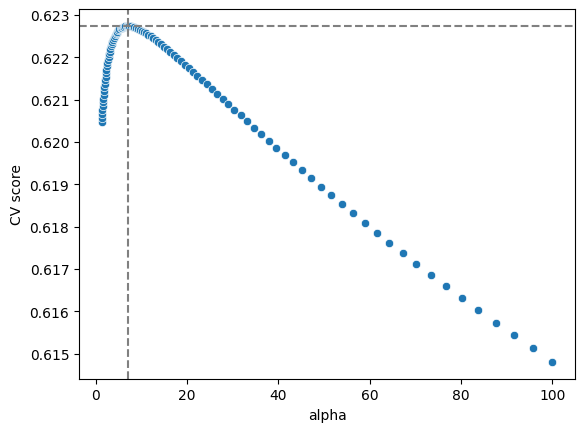

In [124]:
scores = grid_search.cv_results_["mean_test_score"]

plot_grid_search(alphas, scores)
plt.axvline(grid_search.best_params_["alpha"], linestyle="--", color=".5")

In [125]:
alphas = np.linspace(1, 10, 100)
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(Ridge(random_state=42), param_grid, scoring="r2", cv=10)
grid_search.fit(X_cat_train, y_train)

grid_search.best_params_

{'alpha': 7.0}

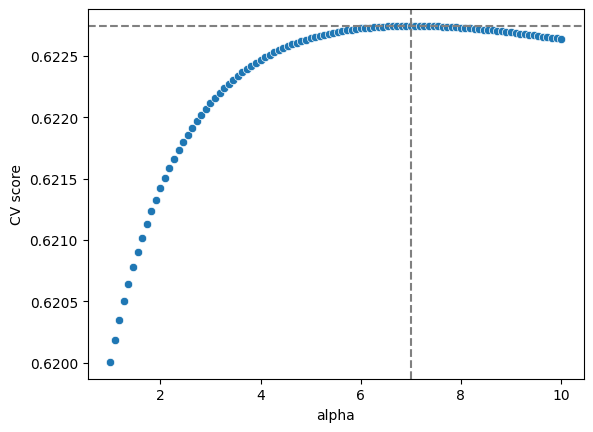

In [126]:
scores = grid_search.cv_results_["mean_test_score"]

plot_grid_search(alphas, scores)
plt.axvline(grid_search.best_params_["alpha"], linestyle="--", color=".5")

In [127]:
y_pred = predict_samples(grid_search, X_cat)
calculate_metrics(y_pred)

{'train': {'R2': 0.6571268786480453, 'MSE': 98280581771.90627},
 'test': {'R2': 0.6438194621656443, 'MSE': 204742744109.8469}}

Полученная модель показывает более высокий `r2_score` на трейне и тесте, т.е. лучше предсказывает таргет.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [128]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [129]:
best_ridge = Ridge(alpha=7.0, random_state=42)
best_ridge.fit(X_cat["train"], y_train)
y_pred = predict_samples(best_ridge, X_cat)
calculate_metrics(y_pred)

{'train': {'R2': 0.6571268786480453, 'MSE': 98280581771.90627},
 'test': {'R2': 0.6438194621656443, 'MSE': 204742744109.8469}}

In [130]:
def business_metrics(y_true, y_pred):
    items = pd.DataFrame({"y_true": y_true, "y_pred": y_pred})
    items["diff_ratio"] = (items["y_true"] - items["y_pred"]) / items["y_pred"]
    return len(items[items["diff_ratio"].abs() <= 0.1]) / len(items)

business_metrics(y_real["train"], y_pred["train"])

0.21113013698630137

In [131]:
business_metrics(y_real["test"], y_pred["test"])

0.25

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [132]:
import pickle

with open("preprocessor.pickle", "wb") as f:
    pickle.dump(preprocessor, f)

with open("ridge.pickle", "wb") as f:
    pickle.dump(best_ridge, f)

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link